In [1]:
from collections import Counter
import pprint

## Read File in

In [2]:
!ls data/ #访谈记录.txt

访谈记录.txt


In [3]:
filename = "data/访谈记录.txt"
with open(filename) as f:
 mytext = f.read()

#print(mytext)

## Break words with Jieba

In [4]:
import jieba
mytext = " ".join(jieba.cut(mytext))

#print(mytext)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.410 seconds.
Prefix dict has been built succesfully.


In [5]:
counter = Counter(mytext)
pprint.pprint(counter.most_common(10))

[(' ', 9905),
 ('，', 666),
 ('是', 500),
 ('的', 413),
 ('。', 347),
 ('个', 334),
 ('就', 328),
 ('\n', 312),
 ('角', 309),
 ('色', 308)]


## Break with PKUSEG

In [6]:
import pkuseg
from collections import Counter
import pprint

content = []
with open("data/访谈记录.txt", encoding="utf-8") as f:
    content = f.read()

lexicon = ['吃','带','角色1','角色2','角色3','角色4','角色5','角色6','角色7','角色8','角色9','角色10','角色11','角色12','角色13','角色14']  #
seg = pkuseg.pkuseg(user_dict=lexicon)  # 加载模型，给定用户词典
text = seg.cut(content)

stopwords = []

with open("stopword.txt", encoding="utf-8") as f:
    stopwords = f.read()

new_text = []

for w in text:
    if w not in stopwords:
        new_text.append(w)

counter = Counter(new_text)
pprint.pprint(counter.most_common(10))



[('医院', 40),
 ('科', 35),
 ('老师', 31),
 ('培训', 29),
 ('住院', 26),
 ('科室', 25),
 ('护士', 23),
 ('吃', 21),
 ('轮转', 20),
 ('带', 19)]


## Make word cloud

In [7]:
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 399.5, 99.5, -0.5)

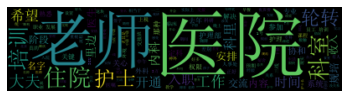

In [8]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="simsun.ttf"
                      ,width=400
                      ,height=100
                     ).generate(" ".join(new_text))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

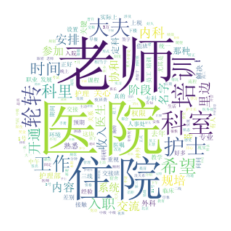

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 140 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(font_path="simsun.ttf", background_color="white", repeat=True, mask=mask)
wc.generate(" ".join(new_text))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

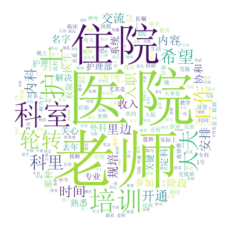

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:400, :400]

mask = (x - 200) ** 2 + (y - 200) ** 2 > 190 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(font_path="simsun.ttf", background_color="white", repeat=True, mask=mask)
wc.generate(" ".join(new_text))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [11]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'scipy'

In [10]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 获取当前文件路径
# __file__ 为当前文件, 在ide中运行此行会报错,可改为
# d = path.dirname('.')
d = path.dirname(__file__)

# 读取文本 alice.txt 在包文件的example目录下
#内容为
"""
Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org
"""
text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image
# taken from http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
# 设置背景图片
alice_coloring = imread(path.join(d, "alice_color.png"))

wc = WordCloud(background_color="white", #背景颜色max_words=2000,# 词云显示的最大词数
mask=alice_coloring,#设置背景图片
stopwords=STOPWORDS.add("said"),
max_font_size=40, #字体最大值
random_state=42)
# 生成词云, 可以用generate输入全部文本(中文不好分词),也可以我们计算好词频后使用generate_from_frequencies函数
wc.generate(text)
# wc.generate_from_frequencies(txt_freq)
# txt_freq例子为[('词a', 100),('词b', 90),('词c', 80)]
# 从背景图片生成颜色值
image_colors = ImageColorGenerator(alice_coloring)

# 以下代码显示图片
plt.imshow(wc)
plt.axis("off")
# 绘制词云
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
# 绘制背景图片为颜色的图片
plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()
# 保存图片
wc.to_file(path.join(d, "名称.png"))
--------------------- 
作者：探索者v 
来源：CSDN 
原文：https://blog.csdn.net/tanzuozhev/article/details/50789226 
版权声明：本文为博主原创文章，转载请附上博文链接！

SyntaxError: invalid syntax (<ipython-input-10-209cb3a14f42>, line 57)